# Forecasting

In this workshop, you will forecast the charging profile of a real EV based on historic data of consumption. 
The dataset you will use corresponds to the charging times of many different households during several years. 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Donwload the data

In [ ]:
!pip install wget
!pip install pandas

from datetime import datetime
!pip install numpy
import numpy as np
!pip install matplotlib

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

from google.colab import files

import os

import io

import csv

import pandas as pd

import matplotlib as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')
# data = '/content/drive/MyDrive/project/data/200/1.csv'
# data = '/content/drive/MyDrive/project/data/200/2.csv'
# data = '/content/drive/MyDrive/project/data/200/3.csv'
# data = '/content/drive/MyDrive/project/data/200/4.csv'
# data = '/content/drive/MyDrive/project/data/200/5.csv'
# data = '/content/drive/MyDrive/project/data/200/10.csv'
# data = '/content/drive/MyDrive/project/data/200/20.csv'
# data = '/content/drive/MyDrive/project/data/200/50.csv'
# data = '/content/drive/MyDrive/project/data/200/100.csv'
data = '/content/drive/MyDrive/project/data/200/200.csv'
np.set_printoptions(suppress=True) # Preventing the use of scientific notation
tab = pd.read_csv(data, sep=',')
tab = tab.interpolate()
tab

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,time,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D192,D193,D194,D195,D196,D197,D198,D199,D200,value
0,'01-Feb-2021 00:00:00',2996,345,1217,115,129,7,147,82,227,...,198,114,242,197,133,212,667,166,166,282.450
1,'01-Feb-2021 00:30:00',2145,183,1607,56,112,7,146,80,182,...,224,46,95,180,66,217,182,107,107,223.005
2,'01-Feb-2021 01:00:00',1855,161,1191,41,127,17,138,66,200,...,192,32,109,165,72,274,109,107,107,206.830
3,'01-Feb-2021 01:30:00',1556,133,1138,34,136,7,125,84,185,...,214,39,75,249,55,262,98,58,58,210.005
4,'01-Feb-2021 02:00:00',1527,11,910,43,119,7,125,81,129,...,200,37,97,531,78,200,88,81,81,187.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,'01-May-2021 21:30:00',349,172,256,124,613,34,268,175,319,...,114,67,631,431,245,190,158,158,158,252.510
4316,'01-May-2021 22:00:00',289,136,286,112,603,20,215,166,160,...,118,68,339,321,120,159,114,175,175,193.625
4317,'01-May-2021 22:30:00',318,146,204,95,598,18,210,250,117,...,116,64,218,237,145,118,174,126,126,175.645
4318,'01-May-2021 23:00:00',345,120,184,106,611,22,496,151,146,...,106,70,152,222,86,80,141,109,109,146.130


# Data Processing/Cleaning

Before implementing a model, we first need to clean the data and prepare it for the training phase.

# Let's select columns of interest

In [ ]:
mycolumns = ['time','value']
df=tab[mycolumns]


A = df
# add the day of week information
A['time'] = pd.to_datetime(A['time'])
A['day_of_week'] = A['time'].dt.dayofweek


# A = df.loc[df['ChargerID'] == End_user_ID]
# # add the day of week information
# A['TimeStamp'] = pd.to_datetime(A['TimeStamp'])
# A['day_of_week'] = A['TimeStamp'].dt.dayofweek
# # normalise the power: we only want to know if the end-user charged or not. 
# A.loc[A['Power_W'] > Min_Power, 'Power_W'] = 1

In [ ]:
A

,time,value,day_of_week
0,2021-02-01 00:00:00,282.450,0
1,2021-02-01 00:30:00,223.005,0
2,2021-02-01 01:00:00,206.830,0
3,2021-02-01 01:30:00,210.005,0
4,2021-02-01 02:00:00,187.930,0
...,...,...,...
4315,2021-05-01 21:30:00,252.510,5
4316,2021-05-01 22:00:00,193.625,5
4317,2021-05-01 22:30:00,175.645,5
4318,2021-05-01 23:00:00,146.130,5


In [ ]:
import itertools


year_list = []
month_list = []
day_list = []
hour_list = []
minute_list = []
min_timeinterval = 30

for combination in itertools.product([2022],[1],[1],list(range(0,24)), [0,30]): # we define a dummy day 2022/01/01 but we are only interested in the time from 0h to 24h
        #print(combination) 
        year_list.append( combination[0] )
        month_list.append( combination[1] )
        day_list.append( combination[2] )
        hour_list.append( combination[3] )
        minute_list.append( combination[4] )


data = {'year':year_list,
                'month':month_list,
                'day':day_list,
                'hour':hour_list,
                'minute':minute_list,
                }

fullday_df = pd.DataFrame(data=data)

fullday_df['time'] = pd.to_datetime( fullday_df[['year', 'month', 'day', 'hour', 'minute']])
fullday_df = fullday_df.drop(columns=['year', 'month', 'day', 'hour', 'minute'])
print(fullday_df)

                  time
0  2022-01-01 00:00:00
1  2022-01-01 00:30:00
2  2022-01-01 01:00:00
3  2022-01-01 01:30:00
4  2022-01-01 02:00:00
5  2022-01-01 02:30:00
6  2022-01-01 03:00:00
7  2022-01-01 03:30:00
8  2022-01-01 04:00:00
9  2022-01-01 04:30:00
10 2022-01-01 05:00:00
11 2022-01-01 05:30:00
12 2022-01-01 06:00:00
13 2022-01-01 06:30:00
14 2022-01-01 07:00:00
15 2022-01-01 07:30:00
16 2022-01-01 08:00:00
17 2022-01-01 08:30:00
18 2022-01-01 09:00:00
19 2022-01-01 09:30:00
20 2022-01-01 10:00:00
21 2022-01-01 10:30:00
22 2022-01-01 11:00:00
23 2022-01-01 11:30:00
24 2022-01-01 12:00:00
25 2022-01-01 12:30:00
26 2022-01-01 13:00:00
27 2022-01-01 13:30:00
28 2022-01-01 14:00:00
29 2022-01-01 14:30:00
30 2022-01-01 15:00:00
31 2022-01-01 15:30:00
32 2022-01-01 16:00:00
33 2022-01-01 16:30:00
34 2022-01-01 17:00:00
35 2022-01-01 17:30:00
36 2022-01-01 18:00:00
37 2022-01-01 18:30:00
38 2022-01-01 19:00:00
39 2022-01-01 19:30:00
40 2022-01-01 20:00:00
41 2022-01-01 20:30:00
42 2022-01-

# Create Training dataset

In this subsection, we will create the output for one day: we now want to create the targets and inputs for our training.
Inputs will be:
1. the type of day (= 0 for monday, ... 6 for sunday)
2. the consumption on the previous day
3. the consumption on the day before the previous day
4. the consumption 3 days before

Outputs will be:
a vector of 96 elements, corresponding to all the quarters in a day. these elements will thus correspond to a timeslot in the day. the first element corresponds to 0:00:00, the second one to 00:00:15  and so on...
These elements will be equal to 1 if the EV is charging at the corresponding time, 0 otherwise.

In [ ]:
# first let's convert the data into numpy arrays
from datetime import datetime
!pip install numpy
import numpy as np
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
Power_A = A['value'].to_numpy()
#on recupere le temps dans timearray
timearray = []
timearray = A['time'].to_numpy()
# print(A['time'])
# print(timearray)
# print(timearray_fullday)

In [ ]:
Power = Power_A/7533
print(Power[0])
print(max(Power))


0.037495021903624054
0.07503053232443914


In [ ]:
Power

array([0.03749502, 0.02960374, 0.02745652, ..., 0.02331674, 0.01939865,
       0.02043077])

In [ ]:
timearray_fullday = []
timearray_fullday = fullday_df['time'].to_numpy()
Day_type = A['day_of_week'].to_numpy()

In [ ]:
timearray

array(['2021-02-01T00:00:00.000000000', '2021-02-01T00:30:00.000000000',
       '2021-02-01T01:00:00.000000000', ...,
       '2021-05-01T22:30:00.000000000', '2021-05-01T23:00:00.000000000',
       '2021-05-01T23:30:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# 30 minutes interval
from datetime import timedelta
# conversion des dates, et on enleve les lignes qui n'etaient pas bonnes (time not in a date format, or just some space instaead of time)
# We create the training (input and target) dataset:

Allday_output = np.empty((48,0),int)
input = np.empty((4,0))
# min_timeinterval = 30
# we create a function that generates a vector with 48 elements, with 1 when the car was charging, 0 when it was not.
def generate_daily_profile(power,data_time, time_fullday ):
    out_profile = []
    index = 0
    for element in time_fullday:
        element = element - np.timedelta64(round((element - data_time[0])/np.timedelta64(1, 'D')),'D') #we change the year month and day of the reference time array for full day
        if (index < data_time.size) and (abs(data_time[index] - element)/np.timedelta64(1, 's') < min_timeinterval/2):  #if the time we have here is in the input data_time array, this means we are charging
            out_profile.append(power[index])
            index = index+1
        else:
            out_profile.append(0)

    return out_profile, index

#first, we must identify the number of days
nb_day = 0
previous_element = timearray[0]
for element in timearray:
    if element.astype('M8[D]') != previous_element.astype('M8[D]'):
        if nb_day>=29:
            temp=0
        nb_day = nb_day +1
    previous_element = element

previous_element = timearray[0]
idx_timearray = 0
previous_idx_timearray = 0
count = 0
consumption_d3 = 0  # consumption of the day -3
consumption_d2 = 0  # consumption of the day -2
consumption_d1 = 0  # consumption of the day -1


for day in range(nb_day):
    # print(day)
    if day >=20:
        temp = 0
    for idx in range(49):#  element in timearray: # we will go through the end user data
        # print(idx)
        
        if timearray[idx+idx_timearray].astype('M8[D]') != previous_element.astype('M8[D]'):
            # dailyprofile_power,current_index = generate_daily_profile(Power[idx_timearray:idx_timearray+idx],timearray[idx_timearray:idx_timearray+idx], timearray_fullday )
            #********************************************************************************
            data_time = timearray[idx_timearray:idx_timearray+idx]
            power = Power[idx_timearray:idx_timearray+idx]
            time_fullday = timearray_fullday 
            out_profile = []
            index = 0
            for element in time_fullday:
                
                element = element - np.timedelta64(round((element - data_time[min(index,data_time.size-1)])/np.timedelta64(1, 'D')),'D') #we change the year month and day of the reference time array for full day
                if (index < data_time.size) and (abs(data_time[index] - element)/np.timedelta64(1, 's') < min_timeinterval/2):  #if the time we have here is in the input data_time array, this means we are charging
                    out_profile.append(power[index])
                    index = index+1
                else:
                    out_profile.append(0)

            dailyprofile_power = out_profile
            current_index = index


            #****************************************************************************
            c = np.datetime_as_string(timearray_fullday, timezone='UTC')
            # df_c = pd.DataFrame(c, columns = ['time'])
            # df_c['power'] = dailyprofile_power
            # df_c.to_csv('daily_profile.csv')
            input = np.c_[input, [Day_type[idx_timearray],consumption_d1,consumption_d2,consumption_d3] ]
            consumption_d3 = consumption_d2
            consumption_d2 = consumption_d1
            consumption_d1 = sum(dailyprofile_power)
            # print(input[0])
            Allday_output = np.c_[Allday_output,dailyprofile_power]
            idx_timearray = idx_timearray + current_index
            break
            
        previous_element = timearray[idx_timearray]
   
    previous_element = timearray[idx_timearray]

df_c = pd.DataFrame(input)
df_c.to_csv('inputsSubstation.csv')
df_c = pd.DataFrame(Allday_output)
df_c.to_csv('outputsSubstation.csv')
target = np.transpose(Allday_output)
# print(target.shape)
input = np.transpose(input)
print(input.shape)
print(target.shape)

(89, 4)
(89, 48)


In [55]:
# Remove weekends and the first three days
Input = []
Target = []
number = int(input.size/input[0].size)
for i in range(number):
  if (i!=0)and(i!=1)and(i!=2)and(input[i][0]!=5)and(input[i][0]!=6):
    Input.append(input[i])
    Target.append(target[i])
Input = pd.DataFrame(Input)
Target = pd.DataFrame(Target)
Input = Input.values
Target = Target.values

# Let's try some AI forecast !

First, we need to split the data between train and test

In [57]:
!pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Input,Target,test_size=0.4,shuffle=True)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Now, we will train different models.
You are asked to test them on different days by changing the variable nb_day_test for each model. The nb_day_test boundary depends on the user you chose.

In [58]:
from sklearn import tree
import calendar
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


model = tree.DecisionTreeRegressor()
model = model.fit(X_train,y_train)

nb_day_test = 15
X_test[nb_day_test:nb_day_test+1,:]
AA = X_test[nb_day_test:nb_day_test+1,:]
y = model.predict(AA)
AA

array([[2.        , 1.68889088, 1.60334263, 1.4335444 ]])

In [59]:
y

array([[0.0314317 , 0.02936679, 0.02416899, 0.02359352, 0.02199389,
        0.02301606, 0.02633612, 0.02560932, 0.02449489, 0.02259591,
        0.02356166, 0.02571685, 0.03027081, 0.03973782, 0.04361808,
        0.04144498, 0.03978495, 0.03143701, 0.02799549, 0.02743064,
        0.02748905, 0.02637661, 0.02654918, 0.02973848, 0.03246515,
        0.03311098, 0.02777645, 0.0279477 , 0.02638258, 0.02768286,
        0.02788066, 0.03308045, 0.0339838 , 0.04234369, 0.04640913,
        0.05659299, 0.06218439, 0.06564052, 0.05745652, 0.0540681 ,
        0.04961635, 0.05150339, 0.04761848, 0.04681335, 0.04176092,
        0.03604872, 0.02800677, 0.02811961]])

In [60]:
time_str = []
for element in timearray_fullday:
    time_str.append(str(element)[-18:-13])


# Decision Tree

39512.27458929434
1033.4734149305555
The  average MSE of decision tree is:  840.6866933892413
The  average MAE of decision tree is:  21.988796062352243
average MAPE of all days:  0.0937246908177977


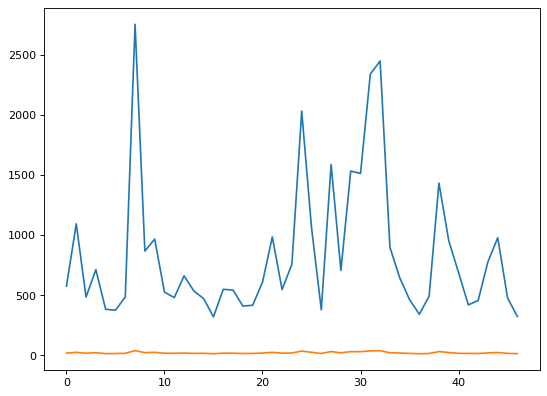

In [61]:
range_1 = 15 # Use every two weeks of data to train the model for each time
range_2 = range_1 + 1 # Forcast the next day, so totally 15 days
# model = tree.DecisionTreeRegressor(criterion="squared_error",max_depth = 3,min_samples_split = 2, min_samples_leaf = 3, random_state = 31) # MSE/MAE
model = tree.DecisionTreeRegressor(criterion="squared_error",max_depth = 2,min_samples_split = 2, min_samples_leaf = 2, random_state = 32) # MSE/MAE

X = [] # Collect the test arrays
Y = [] # Collect the predict arrays
Y_test = [] # Collect the real arrays
size_2 = int(Input.size/Input[0].size) - range_1
# size_2 = 20
for i in range(size_2):
  # X_train, X_test, y_train, y_test = train_test_split(input_test[i:i+range_2],target_test[i:i+range_2],test_size=1/(range_2),shuffle=False)
  X_train, X_test, y_train, y_test = train_test_split(Input[i:i+range_2],Target[i:i+range_2],test_size=1/(range_2),shuffle=False)
  model = model.fit(X_train,y_train)
  y = model.predict(X_test)
  X.append(X_test)
  Y.append(y)
  Y_test.append(y_test)
  # if i == 68:
  #   XX1 = X_train
  #   XX2 = X_test
  #   YY1 = y_train
  #   YY2 = y_test
# Calculate the MSE and MAE for all predicted days

MSE = [] # mean square error
MAE = [] # mean absolute error 
average_MSE = []
average_MAE = []

MAPE = []
average_MAPE = []

for i in range(size_2):
  # Denormalization
  # Y[i] = Y[i]*(Max-Min) + Min # method_1
  # Y_test[i] = Y_test[i]*int(Max-Min) + Min
  Y[i] = Y[i]*7533 # method_2
  Y_test[i] = Y_test[i]*7533

  MSE.append(pow((Y[i] - Y_test[i]),2)) # mean square error
  MAE.append(abs(Y[i] - Y_test[i])) # mean absolute error
  average_MSE.append(sum(sum(MSE[i])) / MSE[i].size)
  average_MAE.append(sum(sum(MAE[i])) / MAE[i].size)
  MAPE.append(abs(Y[i] - Y_test[i])/Y_test[i]) # mean absolute percent error
  average_MAPE.append(sum(sum(MAPE[i])) / MAPE[i].size)

X_MSE = []
X_MAE = []
for i in range(size_2):
  X_MSE.append(i)
  X_MAE.append(i)

plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame

# Show the results of all predicted MSEs and MAEs.
plt.plot(X_MSE, average_MSE)
plt.plot(X_MAE, average_MAE)
print(sum(average_MSE))
print(sum(average_MAE))
print("The  average MSE of decision tree is: ",sum(average_MSE)/size_2)
print("The  average MAE of decision tree is: ",sum(average_MAE)/size_2)
print("average MAPE of all days: ", sum(average_MAPE)/size_2)
# plt.plot(time_str, MSE[number-1][0], label='MSE '+calendar.day_name[int(X[number-1][0,0])])
# plt.plot(time_str, MAE[number-1][0], label='MAE '+calendar.day_name[int(X[number-1][0,0])])
# x_ticks = np.arange(0, 96, 12)
# plt.xticks(x_ticks)
# ax = plt.gca()
# ax.set_facecolor('w')
# plt.legend()
# plt.show()

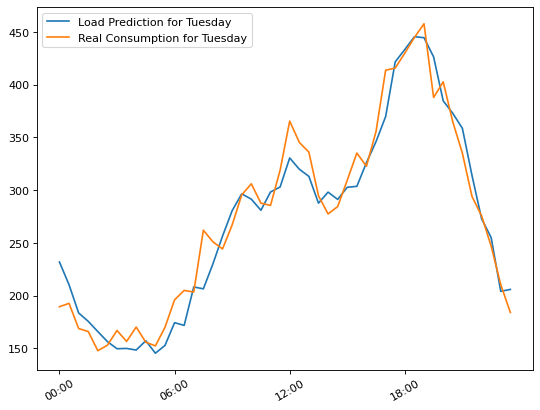

In [62]:
# Forcasting the power conpusmption of the given day.

number = 19
plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame
# plot
plt.plot(time_str,Y[number-1][0], label='Load Prediction for '+calendar.day_name[int(X[number-1][0,0])]) 

plt.plot(time_str,Y_test[number-1][0], label='Real Consumption for '+calendar.day_name[int(X[number-1][0,0])])
# beautify the x-labels
# plt.gcf().autofmt_xtime()
plt.xticks(rotation=30) # Rotate 30 degrees


x_ticks = np.arange(0, 48, 12) 
plt.xticks(x_ticks)
ax = plt.gca()
ax.set_facecolor('w') 
plt.legend()
plt.show()

In [ ]:
# # grid search (for the other method: 14+1)
for abc in range(15,16,5):
# for abc in range(10,31,5):
  ii = 0
  jj = 0
  kk = 0

  i = 0
  min = 1
  range_1 = abc
  range_2 = range_1+1
  size_2 = int(Input.size/Input[0].size) - range_1

  # for i in range(1,4,1):
  #   for j in range(2,15,1):
  #     for k in range(1,20,1):

  for i in range(2,3,1):
    for j in range(2,3,1):
      for k in range(1,103,1):
        S = 0
        model=tree.DecisionTreeRegressor(criterion="squared_error",max_depth = i,min_samples_split = j, min_samples_leaf = 2, random_state = k) # squared_error, absolute_error ,max_depth = 3,random_state = 20
        # model=tree.DecisionTreeRegressor(criterion="absolute_error",max_depth = i,min_samples_split = j, min_samples_leaf = k, random_state = 60) # squared_error, absolute_error
        for num in range(size_2):
          X_train, X_test, y_train, y_test = train_test_split(Input[num:num+range_2],Target[num:num+range_2],test_size=1/(range_2),shuffle=False)
          MSE = []
          MAPE = []
          model.fit(X_train,y_train)
          Y = model.predict(X_test)
          MSE = pow((Y - y_test),2) # New definition of the score
          S = S + sum(sum(MSE))/MSE.size      
          # MAPE = abs(Y - y_test)/y_test # mean absolute percent error
          # S = S + sum(sum(MAPE))/MAPE.size
        # print(i,j,k,S/size_2)
        if min > S/size_2:
          ii = i
          jj = j
          kk = k
          min = S/size_2

  print(abc,ii,jj,kk,min)  

15 2 2 32 1.481488342552103e-05


# Random Forest

In [ ]:
!pip install sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Input,Target,test_size=0.4,shuffle=True)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, max_depth = 5,min_samples_split = 69, min_samples_leaf = 18, random_state = 0) #n_estimators = number of trees in the forest  # To be changed
# criterion="absolute_error",max_depth = 5,min_samples_split = 69, min_samples_leaf = 18, random_state = 60
model = model.fit(X_train,y_train)

28125.97201376117
780.2083917824071
The  average MSE is:  760.1614057773289
The  average MAE is:  21.08671329141641
average MAPE of all days:  0.09022041646715305


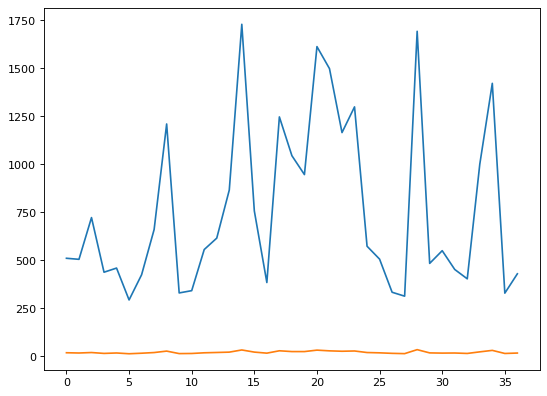

In [63]:
range_1 = 25 # Use every two weeks of data to train the model for each time
range_2 = range_1 + 1 # Forcast the next day, so totally 15 days
model = RandomForestRegressor(n_estimators = 38, criterion="squared_error", max_depth = 4, min_samples_split = 2, min_samples_leaf = 1, random_state = 104) # MSE/MAE
# model = RandomForestRegressor(n_estimators = 37, criterion="absolute_error", max_depth = 1, min_samples_split = 2, min_samples_leaf = 3, random_state = 19) # MAPE   
X = [] # Collect the test arrays
Y = [] # Collect the predict arrays
Y_test = [] # Collect the real arrays
size_2 = int(Input.size/Input[0].size) - range_1
# size_2 = 10
score1 = 0
score2 = 0
for i in range(size_2):
  # X_train, X_test, y_train, y_test = train_test_split(input_test[i:i+range_2],target_test[i:i+range_2],test_size=1/(range_2),shuffle=False)
  X_train, X_test, y_train, y_test = train_test_split(Input[i:i+range_2],Target[i:i+range_2],test_size=1/(range_2),shuffle=False)
  model = model.fit(X_train,y_train)
  y = model.predict(X_test)
  X.append(X_test)
  Y.append(y)
  Y_test.append(y_test)
  # print(i)

# Calculate the MSE and MAE for all predicted days

MSE = [] # mean square error
MAE = [] # mean absolute error 
average_MSE = []
average_MAE = []

MAPE = []
average_MAPE = []

for i in range(size_2):
  # Denormalization
  Y[i] = Y[i]*7533 # method_2
  Y_test[i] = Y_test[i]*7533

  MSE.append(pow((Y[i] - Y_test[i]),2)) # mean square error
  MAE.append(abs(Y[i] - Y_test[i])) # mean absolute error
  average_MSE.append(sum(sum(MSE[i])) / MSE[i].size)
  average_MAE.append(sum(sum(MAE[i])) / MAE[i].size)

  MAPE.append(abs(Y[i] - Y_test[i])/Y_test[i]) # mean absolute percent error
  average_MAPE.append(sum(sum(MAPE[i])) / MAPE[i].size)


X_MSE = []
X_MAE = []
for i in range(size_2):
  X_MSE.append(i)
  X_MAE.append(i)

plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame

# Show the results of all predicted MSEs and MAEs.
plt.plot(X_MSE, average_MSE)
plt.plot(X_MAE, average_MAE)
print(sum(average_MSE))
print(sum(average_MAE))
print("The  average MSE is: ",sum(average_MSE)/size_2)
print("The  average MAE is: ",sum(average_MAE)/size_2)
print("average MAPE of all days: ", sum(average_MAPE)/size_2)

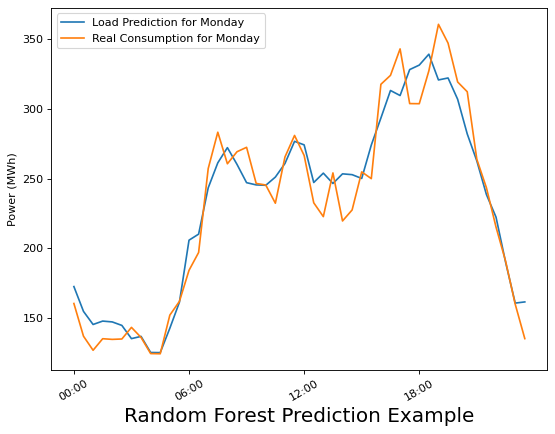

In [ ]:
# Forcasting the power conpusmption of the given day.

number = 28
plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame
# plot
plt.plot(time_str,Y[number-1][0], label='Load Prediction for '+calendar.day_name[int(X[number-1][0,0])]) 

plt.plot(time_str,Y_test[number-1][0], label='Real Consumption for '+calendar.day_name[int(X[number-1][0,0])])
# beautify the x-labels
# plt.gcf().autofmt_xtime()
plt.xticks(rotation=30) # Rotate 30 degrees
font1 = {'family' : 'Times New Roman', 'weight' : 'normal', 'size': 10,}
font2 = {'family' : 'Times New Roman', 'weight' : 'normal', 'size': 18,}

plt.xlabel("Random Forest Prediction Example",font2)         
plt.ylabel(r"Power (MWh)",font1) 

x_ticks = np.arange(0, 48, 12) 
plt.xticks(x_ticks)
ax = plt.gca()
ax.set_facecolor('w') 
plt.legend()
plt.show()

In [ ]:
# # grid search (for the other method: 14+1)
for abc in range(25,26,5):
  ii = 0
  jj = 0
  kk = 0
  ll = 0
  mm = 0

  i = 0
  min = 1000
  range_1 = abc
  range_2 = range_1+1
  size_2 = int(Input.size/Input[0].size) - range_1

  #   for j in range(1,8/11,1):
  #     for k in range(2,14,1):
  #       for l in range(1,7,1):

  for i in range(38,39,1):
    for j in range(4,5,1):
      for k in range(2,3,1):
        for l in range(1,2,1):
          for m in range(94,115,1):
            S = 0
            # model = RandomForestRegressor(n_estimators = i, criterion="squared_error", max_depth = j, min_samples_split = k, min_samples_leaf = 3, random_state = 86)    
            model = RandomForestRegressor(criterion="squared_error",n_estimators = i,max_depth = j,min_samples_split = k,min_samples_leaf = l,random_state = m)    
            for num in range(size_2):
              X_train, X_test, y_train, y_test = train_test_split(Input[num:num+range_2],Target[num:num+range_2],test_size=1/(range_2),shuffle=False)
              MSE = []
              model.fit(X_train,y_train)
              Y = model.predict(X_test)
              MSE = pow((Y - y_test),2) # New definition of the score
              S = S + sum(sum(MSE))/MSE.size
              # MAPE = abs(Y - y_test)/y_test # mean absolute percent error
              # S = S + sum(sum(MAPE))/MAPE.size
            print(i,j,k,l,m,S/size_2)
            if min > S/size_2:
              ii = i
              jj = j
              kk = k
              ll = l
              mm = m
              min = S/size_2

  print(abc,ii,jj,kk,ll,mm,min)  


38 4 2 1 94 1.4426809920225722e-05
38 4 2 1 95 1.5234559833497414e-05
38 4 2 1 96 1.3961167938097697e-05
38 4 2 1 97 1.4624189481467872e-05
38 4 2 1 98 1.4335471558600188e-05
38 4 2 1 99 1.437351173253914e-05
38 4 2 1 100 1.4665891863258207e-05
38 4 2 1 101 1.4377748774568968e-05
38 4 2 1 102 1.4679011869924604e-05
38 4 2 1 103 1.380141350566537e-05
38 4 2 1 104 1.3395837830820887e-05
38 4 2 1 105 1.4653831493724263e-05
38 4 2 1 106 1.4346590416292228e-05
38 4 2 1 107 1.431989823310676e-05
38 4 2 1 108 1.4586117657640625e-05
38 4 2 1 109 1.3777444343465905e-05
38 4 2 1 110 1.4361448212850143e-05
38 4 2 1 111 1.4646119409145462e-05
38 4 2 1 112 1.43977577222359e-05
38 4 2 1 113 1.5085862626364156e-05
38 4 2 1 114 1.4405839184444894e-05
25 38 4 2 1 104 1.3395837830820887e-05


In [ ]:
# 25 35 9 2 1 104 1.3764728178208656e-05 ab
# 25 35 6 2 1 104 1.3584485991218171e-05 sq

# 25 28 5 3 1 104 1.3403681420249118e-05 ab
# 25 38 4 2 1 104 1.3395837830820887e-05 sq


# kNN

0.0008744215282618259
0.1673057390076257
The  average MSE is:  1.5340728565996946e-05
The  average MAE is:  0.002935188403642556
average MAPE of all days:  0.09010309226613872


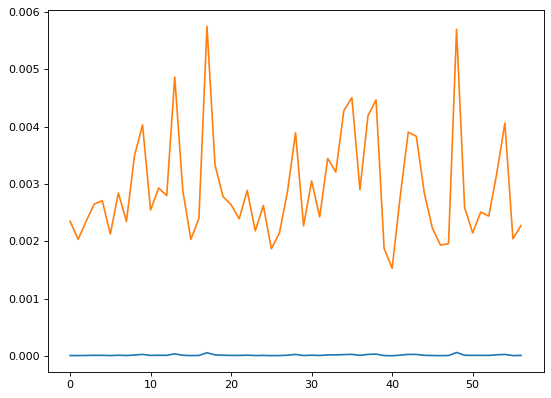

In [64]:
from sklearn.neighbors import KNeighborsRegressor

range_1 = 5 # Use every two weeks of data to train the model for each time
range_2 = range_1 + 1 # Forcast the next day, so totally 15 days
# model= KNeighborsRegressor(p=1, n_neighbors=5, weights='distance') # MAPE
model= KNeighborsRegressor(p=1, n_neighbors=3, weights='uniform') # MSE/MAE
X = [] # Collect the test arrays
Y = [] # Collect the predict arrays
Y_test = [] # Collect the real arrays
size_2 = int(Input.size/Input[0].size) - range_1
# size_2 = 10
for i in range(size_2):
  # X_train, X_test, y_train, y_test = train_test_split(input_test[i:i+range_2],target_test[i:i+range_2],test_size=1/(range_2),shuffle=False)
  X_train, X_test, y_train, y_test = train_test_split(Input[i:i+range_2],Target[i:i+range_2],test_size=1/(range_2),shuffle=False)
  model = model.fit(X_train,y_train)
  y = model.predict(X_test)
  X.append(X_test)
  Y.append(y)
  Y_test.append(y_test)

# Calculate the MSE and MAE for all predicted days

MSE = [] # mean square error
MAE = [] # mean absolute error 
average_MSE = []
average_MAE = []
MAPE = []
average_MAPE = []

for i in range(size_2):
  # Denormalization
  # Y[i] = Y[i]*7533 # method_2
  # Y_test[i] = Y_test[i]*7533

  MSE.append(pow((Y[i] - Y_test[i]),2)) # mean square error
  MAE.append(abs(Y[i] - Y_test[i])) # mean absolute error
  average_MSE.append(sum(sum(MSE[i])) / MSE[i].size)
  average_MAE.append(sum(sum(MAE[i])) / MAE[i].size)
  MAPE.append(abs(Y[i] - Y_test[i])/Y_test[i]) # mean absolute percent error
  average_MAPE.append(sum(sum(MAPE[i])) / MAPE[i].size)

X_MSE = []
X_MAE = []
for i in range(size_2):
  X_MSE.append(i)
  X_MAE.append(i)

plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame

# Show the results of all predicted MSEs and MAEs.
plt.plot(X_MSE, average_MSE)
plt.plot(X_MAE, average_MAE)
print(sum(average_MSE))
print(sum(average_MAE))
print("The  average MSE is: ",sum(average_MSE)/size_2)
print("The  average MAE is: ",sum(average_MAE)/size_2)
print("average MAPE of all days: ", sum(average_MAPE)/size_2)


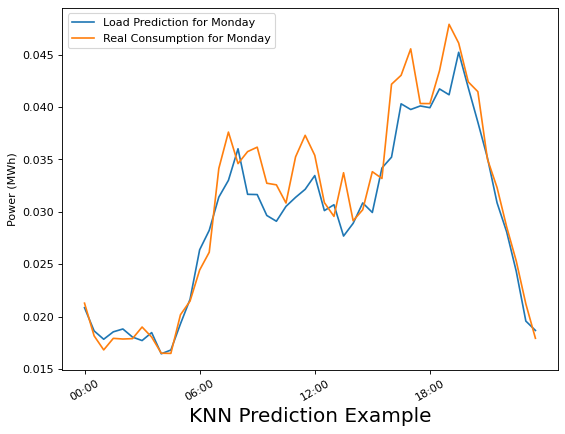

In [65]:
# Forcasting the power conpusmption of the given day.

number = 48
plt.figure(facecolor='w', figsize=(8, 6), dpi=80) # frame
# plot
plt.plot(time_str,Y[number-1][0], label='Load Prediction for '+calendar.day_name[int(X[number-1][0,0])]) 

plt.plot(time_str,Y_test[number-1][0], label='Real Consumption for '+calendar.day_name[int(X[number-1][0,0])])
# beautify the x-labels
# plt.gcf().autofmt_xtime()
plt.xticks(rotation=30) # Rotate 30 degrees
font1 = {'family' : 'Times New Roman', 'weight' : 'normal', 'size': 10,}
font2 = {'family' : 'Times New Roman', 'weight' : 'normal', 'size': 18,}

plt.xlabel("KNN Prediction Example",font2)         
plt.ylabel(r"Power (MWh)",font1) 

x_ticks = np.arange(0, 48, 12) 
plt.xticks(x_ticks)
ax = plt.gca()
ax.set_facecolor('w') 
plt.legend()
plt.show()

In [ ]:
# # grid search (for the other method: 14+1)
for abc in range(5,46,5):
  ii = 0
  jj = 0
  num_of_tree = []
  i = 0
  min = 10
  range_1 = abc
  range_2 = range_1+1
  size_2 = int(Input.size/Input[0].size) - range_1

  for i in range(1,3,1):
    for j in range(1,range_2,1):
      S = 0
      model= KNeighborsRegressor(p=i, n_neighbors=j, weights='distance')
      for num in range(size_2):
        X_train, X_test, y_train, y_test = train_test_split(Input[num:num+range_2],Target[num:num+range_2],test_size=1/(range_2),shuffle=False)
        MSE = []
        model.fit(X_train,y_train)
        Y = model.predict(X_test)
        MSE = pow((Y - y_test),2) # New definition of the score
        S = S + sum(sum(MSE))/MSE.size
        # MAPE = abs(Y - y_test)/y_test # mean absolute percent error
        # S = S + sum(sum(MAPE))/MAPE.size
      # print(i,j,S/size_2)
      num_of_tree.append(S/size_2)
      if min > S/size_2:
        ii = i
        jj = j
        min = S/size_2

  print(abc,ii,jj,min)  

5 1 5 1.6722802081274574e-05
10 1 7 1.5427744482999954e-05
15 1 10 1.643270609505505e-05
20 1 13 1.8308259953116848e-05
25 1 8 1.848148651073234e-05
30 1 10 1.9335469389760483e-05
35 2 4 2.12550587040232e-05
40 1 4 2.217347221276549e-05
45 1 4 1.9725802945624606e-05


In [ ]:
# 5 1 3 1.5340728565996946e-05